# Problem statement
- we are given with image data which belongs to 16 categories...we need to build CNN model to classify the given image into its category using transfer learning with VGG16 model...

# Transfer Learning 

Download all the data in this <a href='https://drive.google.com/open?id=1Z4TyI7FcFVEx8qdl4jO9qxvxaqLSqoEu'>rar_file</a> , it contains all the data required for the project.
 When you unrar the file you'll get the files in the following format: <b>path/to/the/image.tif,category</b>
            
    where the categories are numbered 0 to 15, in the following order:
<pre>
    <b>0 letter
    1 form
    2 email
    3 handwritten
    4 advertisement
    5 scientific report
    6 scientific publication
    7 specification
    8 file folder
    9 news article
    10 budget
    11 invoice
    12 presentation
    13 questionnaire
    14 resume
    15 memo</b>
    
</pre>

There is a file named as 'labels_final.csv' , it consists of two columns. First column is path which is the required path to the images and second is the class label.

In [ ]:
#the dataset that we are dealing with is quite large 3.7 GB and hence there are two methods to import the data to Colab 
# Method 1- you can use gdown module to get the data directly from Google drive to Colab
# the syntax is as follows !gdown --id file_id , for ex - running the below cell will import the rvl-cdip.rar dataset


In [ ]:
#!gdown --id 1Z4TyI7FcFVEx8qdl4jO9qxvxaqLSqoEu

In [ ]:
# Method -2 you can also import the data using wget function
#https://www.youtube.com/watch?v=BPUfVq7RaY8


In [ ]:
#unrar the file
#get_ipython().system_raw("unrar x rvl-cdip.rar")

#### On this image data, we are training 3 types of models as given below we have to split the data into Train and Validation data.

### Model-1

<pre>
1. Use <a href='https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16'>VGG-16</a> pretrained network without Fully Connected layers and initilize all the weights with Imagenet trained weights. 
2. After VGG-16 network without FC layers, add a new Conv block ( 1 Conv layer and 1 Maxpooling ), 2 FC layers and an output layer to classify 16 classes. You are free to choose any hyperparameters/parameters of conv block, FC layers, output layer. 
3. Final architecture will be <b>INPUT --> VGG-16 without Top layers(FC) --> Conv Layer --> Maxpool Layer --> 2 FC layers --> Output Layer</b>
4.Print model.summary() and plot the architecture of the model. 
<a href='https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model'>Reference for plotting model</a>
5. Train only new Conv block, FC layers, output layer. Don't train the VGG-16 network. 

</pre>

In [ ]:
!curl --header "Host: www.kaggle.com" --header "User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36" --header "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header "Accept-Language: en-US,en;q=0.9" --header "Referer: https://www.kaggle.com/datasets/brahma0545/aaic-assignment-tl" --header "Cookie: ka_sessionid=136c38012649b2a544a106a3269945ce; CSRF-TOKEN=CfDJ8D8gLlFpCUFNkxUzpCdbBC-1xDZiiIybkSx1zAa4JU6QNGrJPbVzbLT8sK3eFuOlGIkEKiWAbEohN84SvUV7AheE-nPYLpdFdUKq7B4YEg; GCLB=CNWsztHumrfUMw; __Host-KAGGLEID=CfDJ8D8gLlFpCUFNkxUzpCdbBC-ni5rmjjx1gkU5rt68mVMm0-clwwbRedhQz7mtmLELsiWp7lRjvJ_sGhfoCDEIKlIUuulaMkTF-MFQfUtTDyBg3QnC7SF-lhpx; _ga=GA1.2.259247009.1671617737; _gid=GA1.2.122023333.1671617737; XSRF-TOKEN=CfDJ8D8gLlFpCUFNkxUzpCdbBC9HPvewz2Jdv1M6NeTvSpcdyaHuCo0pI2KIBHutZTBHbLP_6V6AuZUjiTZ6lh9wOXwQHLa8dZ5rP_2d7nG4BwEKyg0xzGHQy1sv5QexAufjBhBlhmHEgLI3Qbz5gYm3Xjc; CLIENT-TOKEN=eyJhbGciOiJub25lIiwidHlwIjoiSldUIn0.eyJpc3MiOiJrYWdnbGUiLCJhdWQiOiJjbGllbnQiLCJzdWIiOiJuYXRhcmFqYW5tb2hhbjMzIiwibmJ0IjoiMjAyMi0xMi0yMVQxMDozNToxNy43MzU1OTg3WiIsImlhdCI6IjIwMjItMTItMjFUMTA6MzU6MTcuNzM1NTk4N1oiLCJqdGkiOiJiYzMwMWI5NS1kODlkLTQ4YmUtOGQwYS05YTUxZjA1YWNkNWQiLCJleHAiOiIyMDIzLTAxLTIxVDEwOjM1OjE3LjczNTU5ODdaIiwidWlkIjo4ODY3MTI0LCJkaXNwbGF5TmFtZSI6Ik5hdGFyYWphbiBNb2hhbmt1bWFyIiwiZW1haWwiOiJuYXRhcmFqYW4ubW9oYW4zM0BnbWFpbC5jb20iLCJ0aWVyIjoiTm92aWNlIiwidmVyaWZpZWQiOnRydWUsInByb2ZpbGVVcmwiOiIvbmF0YXJhamFubW9oYW4zMyIsInRodW1ibmFpbFVybCI6Imh0dHBzOi8vc3RvcmFnZS5nb29nbGVhcGlzLmNvbS9rYWdnbGUtYXZhdGFycy90aHVtYm5haWxzL2RlZmF1bHQtdGh1bWIucG5nIiwiZmYiOlsiS2VybmVsc0RyYWZ0VXBsb2FkQmxvYiIsIktlcm5lbHNGaXJlYmFzZUxvbmdQb2xsaW5nIiwiS2VybmVsc1N0YWNrT3ZlcmZsb3dTZWFyY2giLCJDb21tdW5pdHlLbUltYWdlVXBsb2FkZXIiLCJUUFVDb21taXRTY2hlZHVsaW5nIiwiQWxsb3dGb3J1bUF0dGFjaG1lbnRzIiwiS2VybmVsc1NhdmVDZWxsT3V0cHV0IiwiVHB1T25lVm0iLCJLTUxlYXJuRGV0YWlsIiwiS01FZGl0b3JTbGlkZXJQYW5lbHMiLCJGcm9udGVuZENvbnNvbGVFcnJvclJlcG9ydGluZyIsIlJlZ2lzdHJhdGlvbk5ld3NFbWFpbFNpZ251cElzT3B0T3V0IiwiUGhvbmVWZXJpZnlGb3JDb21tZW50cyIsIlBob25lVmVyaWZ5Rm9yTmV3VG9waWMiLCJMaWhwTmV4dFN0ZXBzIiwiTGlocE5leHRTdGVwc01ldHJpY3MiLCJLbUNvbXBzU3VibWlzc2lvblBhZ2UiLCJEaXNjdXNzaW9uc1RvcGljRGV0YWlsIiwiTGVhcm5HdWlkZXMiLCJEYXRhc2V0c01ldGFkYXRhVG9EYXRhVGFiIiwiRGF0YXNldHNWYWxpZGF0ZVVwbG9hZGVkWmlwRmlsZXMiLCJEYXRhc2V0c1VzYWJpbGl0eVYyIiwiS2VybmVsRWRpdG9ySGFuZGxlTW91bnRPbmNlIiwiQ29tcGV0aXRpb25zV3JpdGVVcCJdLCJmZmQiOnsiS2VybmVsRWRpdG9yQXV0b3NhdmVUaHJvdHRsZU1zIjoiMzAwMDAiLCJGcm9udGVuZEVycm9yUmVwb3J0aW5nU2FtcGxlUmF0ZSI6IjAuMDEiLCJFbWVyZ2VuY3lBbGVydEJhbm5lciI6InsgfSIsIkNsaWVudFJwY1JhdGVMaW1pdCI6IjQwIiwiRmVhdHVyZWRDb21tdW5pdHlDb21wZXRpdGlvbnMiOiIzNTMyNSwzNzE3NCwzMzU3OSwzNzg5OCwzNzM1NCwzNzk1OSwzODg2MCIsIkFkZEZlYXR1cmVGbGFnc1RvUGFnZUxvYWRUYWciOiJkaXNhYmxlZCJ9LCJwaWQiOiJrYWdnbGUtMTYxNjA3Iiwic3ZjIjoid2ViLWZlIiwic2RhayI6IkFJemFTeUE0ZU5xVWRSUnNrSnNDWldWei1xTDY1NVhhNUpFTXJlRSIsImJsZCI6ImM4ZmMzNzZhNjE0ODBjY2FkY2ZhMTdiNjZjMzM1OTc1MTAyYmNhMTkifQ.; _gat_gtag_UA_12629138_1=1" --header "Connection: keep-alive" "https://www.kaggle.com/datasets/brahma0545/aaic-assignment-tl/download?datasetVersionNumber=1" -L -o "archive.zip"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 4442M  100 4442M    0     0  20.7M      0  0:03:33  0:03:33 --:--:-- 22.6M


In [ ]:
#!wget --header='Host: www.kaggle.com' --header='User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36' --header='Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9' --header='Accept-Language: en-US,en;q=0.9' --header='Referer: https://www.kaggle.com/datasets/brahma0545/aaic-assignment-tl' --header='Cookie: ka_sessionid=136c38012649b2a544a106a3269945ce; __Host-KAGGLEID=CfDJ8D8gLlFpCUFNkxUzpCdbBC-ni5rmjjx1gkU5rt68mVMm0-clwwbRedhQz7mtmLELsiWp7lRjvJ_sGhfoCDEIKlIUuulaMkTF-MFQfUtTDyBg3QnC7SF-lhpx; _ga=GA1.2.259247009.1671617737; _gid=GA1.2.122023333.1671617737; CSRF-TOKEN=CfDJ8D8gLlFpCUFNkxUzpCdbBC_GqEjTL8ATMFeewMd56FN99Slr8CUyWOcBtp6ycMvwiBHj8oTfFYqz4gL0VcettH3jHF3FjUmLMVzmqWxbHA; GCLB=CO-Zx7Gy1prvMg; XSRF-TOKEN=CfDJ8D8gLlFpCUFNkxUzpCdbBC8p95qP9ywIsHV7qHOgxIt2RfT_EcGVtaQuAUrtxYiLpsDKF7EelXHJA63hQfEPy0ixJ8OuVQO1q67dPwT4Q3kYHglTgW4w4OfHAcQAapd7UhWZzBZ9y04KCnqijBPeebw; CLIENT-TOKEN=eyJhbGciOiJub25lIiwidHlwIjoiSldUIn0.eyJpc3MiOiJrYWdnbGUiLCJhdWQiOiJjbGllbnQiLCJzdWIiOiJuYXRhcmFqYW5tb2hhbjMzIiwibmJ0IjoiMjAyMi0xMi0yMVQxODoxODoyNy4zNjk0MDQ4WiIsImlhdCI6IjIwMjItMTItMjFUMTg6MTg6MjcuMzY5NDA0OFoiLCJqdGkiOiIxMDlhMmJmZC03ODU4LTQ1OTgtODI5My01N2E4MjY4ZDQ0YzQiLCJleHAiOiIyMDIzLTAxLTIxVDE4OjE4OjI3LjM2OTQwNDhaIiwidWlkIjo4ODY3MTI0LCJkaXNwbGF5TmFtZSI6Ik5hdGFyYWphbiBNb2hhbmt1bWFyIiwiZW1haWwiOiJuYXRhcmFqYW4ubW9oYW4zM0BnbWFpbC5jb20iLCJ0aWVyIjoiTm92aWNlIiwidmVyaWZpZWQiOnRydWUsInByb2ZpbGVVcmwiOiIvbmF0YXJhamFubW9oYW4zMyIsInRodW1ibmFpbFVybCI6Imh0dHBzOi8vc3RvcmFnZS5nb29nbGVhcGlzLmNvbS9rYWdnbGUtYXZhdGFycy90aHVtYm5haWxzL2RlZmF1bHQtdGh1bWIucG5nIiwiZmYiOlsiS2VybmVsc0RyYWZ0VXBsb2FkQmxvYiIsIktlcm5lbHNGaXJlYmFzZUxvbmdQb2xsaW5nIiwiS2VybmVsc1N0YWNrT3ZlcmZsb3dTZWFyY2giLCJDb21tdW5pdHlLbUltYWdlVXBsb2FkZXIiLCJUUFVDb21taXRTY2hlZHVsaW5nIiwiQWxsb3dGb3J1bUF0dGFjaG1lbnRzIiwiS2VybmVsc1NhdmVDZWxsT3V0cHV0IiwiVHB1T25lVm0iLCJLTUxlYXJuRGV0YWlsIiwiS01FZGl0b3JTbGlkZXJQYW5lbHMiLCJGcm9udGVuZENvbnNvbGVFcnJvclJlcG9ydGluZyIsIlJlZ2lzdHJhdGlvbk5ld3NFbWFpbFNpZ251cElzT3B0T3V0IiwiUGhvbmVWZXJpZnlGb3JDb21tZW50cyIsIlBob25lVmVyaWZ5Rm9yTmV3VG9waWMiLCJMaWhwTmV4dFN0ZXBzIiwiTGlocE5leHRTdGVwc01ldHJpY3MiLCJLbUNvbXBzU3VibWlzc2lvblBhZ2UiLCJEaXNjdXNzaW9uc1RvcGljRGV0YWlsIiwiTGVhcm5HdWlkZXMiLCJEYXRhc2V0c01ldGFkYXRhVG9EYXRhVGFiIiwiRGF0YXNldHNWYWxpZGF0ZVVwbG9hZGVkWmlwRmlsZXMiLCJEYXRhc2V0c1VzYWJpbGl0eVYyIiwiS2VybmVsRWRpdG9ySGFuZGxlTW91bnRPbmNlIiwiQ29tcGV0aXRpb25zV3JpdGVVcCJdLCJmZmQiOnsiS2VybmVsRWRpdG9yQXV0b3NhdmVUaHJvdHRsZU1zIjoiMzAwMDAiLCJGcm9udGVuZEVycm9yUmVwb3J0aW5nU2FtcGxlUmF0ZSI6IjAuMDEiLCJFbWVyZ2VuY3lBbGVydEJhbm5lciI6InsgfSIsIkNsaWVudFJwY1JhdGVMaW1pdCI6IjQwIiwiRmVhdHVyZWRDb21tdW5pdHlDb21wZXRpdGlvbnMiOiIzNTMyNSwzNzE3NCwzMzU3OSwzNzg5OCwzNzM1NCwzNzk1OSwzODg2MCIsIkFkZEZlYXR1cmVGbGFnc1RvUGFnZUxvYWRUYWciOiJkaXNhYmxlZCJ9LCJwaWQiOiJrYWdnbGUtMTYxNjA3Iiwic3ZjIjoid2ViLWZlIiwic2RhayI6IkFJemFTeUE0ZU5xVWRSUnNrSnNDWldWei1xTDY1NVhhNUpFTXJlRSIsImJsZCI6ImQ3NmVmOTcxMDJjZjRlMzhhNGY5YWFhY2Y5NmRiOGUxODllOGQ1OWUifQ.; _gat_gtag_UA_12629138_1=1' --header='Connection: keep-alive' 'https://www.kaggle.com/datasets/brahma0545/aaic-assignment-tl/download?datasetVersionNumber=1' -c -O 'archive.zip'

In [ ]:
#!kaggle datasets download -d brahma0545/aaic-assignment-tl

In [ ]:
import zipfile

with zipfile.ZipFile('/content/archive.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
import matplotlib.pyplot as plt # importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import datetime, os
from tensorflow import keras
from keras.models import Model

In [ ]:
#get_ipython().system_raw("unrar x archive.zip") # extracting the uploaded file

In [ ]:
df=pd.read_csv("labels_final.csv")

In [ ]:
df.head(5)

,path,label
0,imagesv/v/o/h/voh71d00/509132755+-2755.tif,3
1,imagesl/l/x/t/lxt19d00/502213303.tif,3
2,imagesx/x/e/d/xed05a00/2075325674.tif,2
3,imageso/o/j/b/ojb60d00/517511301+-1301.tif,3
4,imagesq/q/z/k/qzk17e00/2031320195.tif,7


In [ ]:
labels_dict={ 0 :"letter",
    1 :"form",
    2 :"email",
    3 :"handwritten",
    4 :"advertisement",
    5 :"scientific report",
    6 :"scientific publication",
    7 :"specification",
    8 :"file folder",
    9 :"news article",
    10 :" budget",
    11 :"invoice",
    12 :" presentation",
    13 :"questionnaire",
    14 :"resume",
    15: "memo"}

In [ ]:
df['label']=df['label'].apply(lambda x:labels_dict[x])
df.head(5)

,path,label
0,imagesv/v/o/h/voh71d00/509132755+-2755.tif,handwritten
1,imagesl/l/x/t/lxt19d00/502213303.tif,handwritten
2,imagesx/x/e/d/xed05a00/2075325674.tif,email
3,imageso/o/j/b/ojb60d00/517511301+-1301.tif,handwritten
4,imagesq/q/z/k/qzk17e00/2031320195.tif,specification


In [ ]:
from keras_preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1/255., validation_split=0.2) #image generator

print("------TRAIN DATA-------")   # train data
train_generator = datagen.flow_from_dataframe(dataframe=df, directory="/content/data_final",
                                             x_col='path',
                                             y_col='label', # using flow from data frame
                                    target_size=(256,256),
                                             class_mode='categorical',
                                             batch_size=32,
                                             drop_remainder=True,
                                             subset='training',
                                             seed=7)
print("------CROSS VALIDATION DATA-------") # cross validation data

validation_generator = datagen.flow_from_dataframe(dataframe=df, directory="/content/data_final",
                                             x_col='path',
                                             y_col='label',
                                             target_size=(256,256),
                                             class_mode='categorical',
                                             batch_size=32,
                                              drop_remainder=True,
                                             subset='validation',
                                             seed=7)

------TRAIN DATA-------
Found 38400 validated image filenames belonging to 16 classes.
------CROSS VALIDATION DATA-------
Found 9600 validated image filenames belonging to 16 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
%load_ext tensorboard

In [ ]:
logdir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") # tensorboard
tensorboard_callback = TensorBoard(log_dir=logdir, histogram_freq=0)

In [ ]:
IMAGE_SIZE = [256, 256] #pre trained vgg16 model
model = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

model.summary() #pre trained vgg16 model

58889256/58889256 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                              

In [ ]:
train_steps = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

In [ ]:
#model_1
for layer in model.layers:
  layer.trainable = False
#Adding custom Layers 
x = model.output
x = Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu")(x)
x = MaxPool2D(2,2)(x)
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dense(128, activation="relu")(x)
output = Dense(16, activation="softmax")(x)
# creating the final model 
model_1 = Model(inputs = model.input, outputs = output)
# compile the model 
model_1.compile(loss = "categorical_crossentropy", optimizer ='Adam', metrics=["accuracy"])

In [ ]:
# summary of the model_1
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:

#fitting the model_1
model_1.fit_generator(train_generator,steps_per_epoch=train_steps, epochs=5,
                              validation_data=validation_generator,validation_steps=validation_steps,callbacks=[tensorboard_callback])

<ipython-input-19-f33c75d26d90>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_1.fit_generator(train_generator,steps_per_epoch=train_steps, epochs=5,


Epoch 1/5
1200/1200 [==============================] - 333s 266ms/step - loss: 1.3061 - accuracy: 0.5939 - val_loss: 1.0037 - val_accuracy: 0.6965
Epoch 2/5
1200/1200 [==============================] - 352s 294ms/step - loss: 0.8966 - accuracy: 0.7256 - val_loss: 0.8949 - val_accuracy: 0.7352
Epoch 3/5
1200/1200 [==============================] - 315s 262ms/step - loss: 0.7528 - accuracy: 0.7684 - val_loss: 0.8907 - val_accuracy: 0.7389
Epoch 4/5
1200/1200 [==============================] - 309s 258ms/step - loss: 0.6509 - accuracy: 0.7988 - val_loss: 0.8663 - val_accuracy: 0.7506
Epoch 5/5
1200/1200 [==============================] - 314s 262ms/step - loss: 0.5694 - accuracy: 0.8202 - val_loss: 0.8897 - val_accuracy: 0.7464


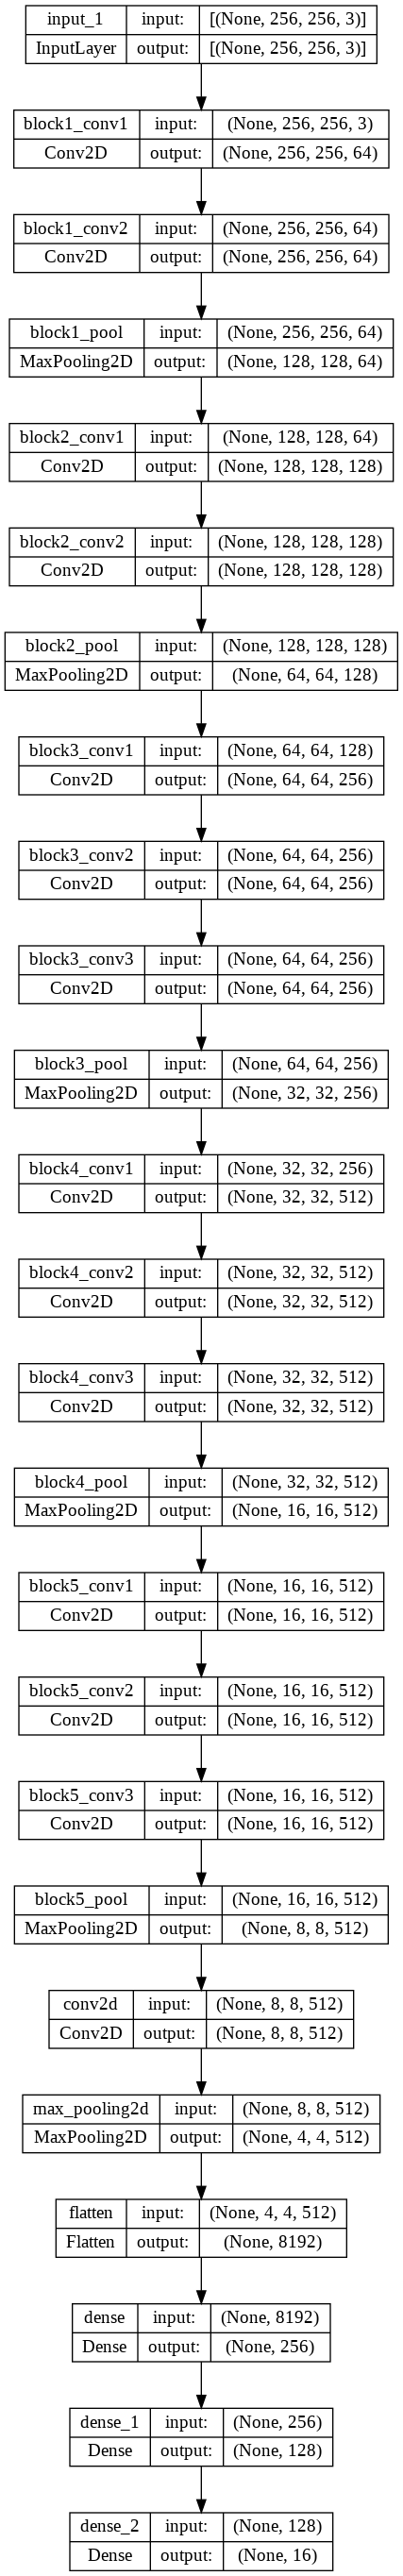

In [ ]:
# model graphs
tf.keras.utils.plot_model(
    model_1, to_file='model_1.png', show_shapes=True, show_layer_names=True, 
    rankdir='TB', expand_nested=False, dpi=96
)

In [ ]:
!rm -rf ./logs/ 

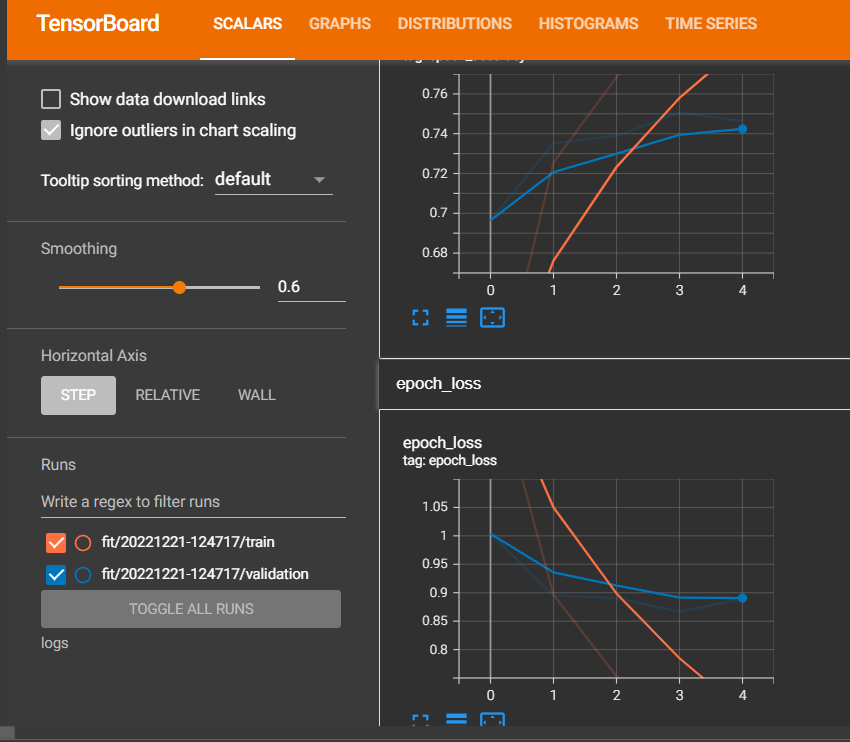

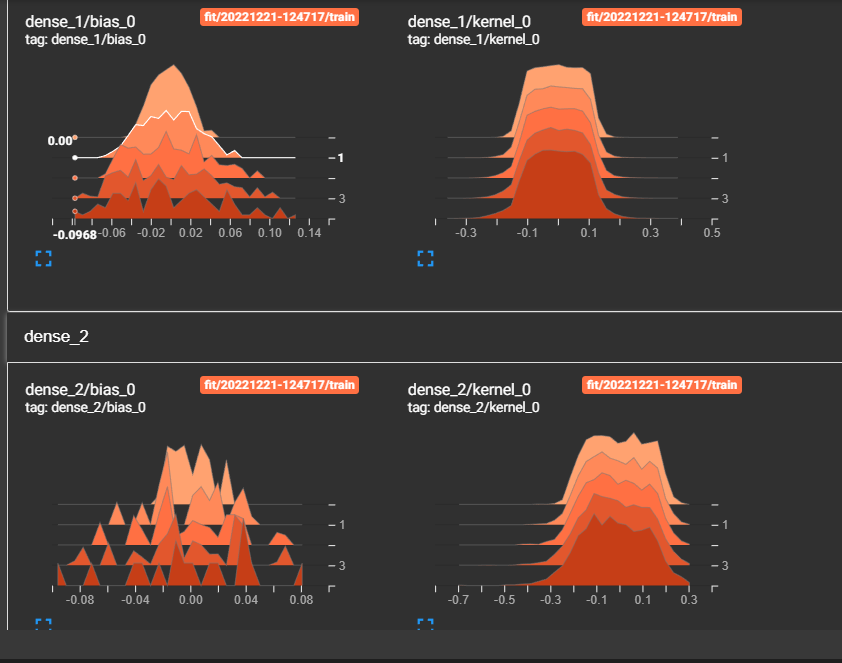

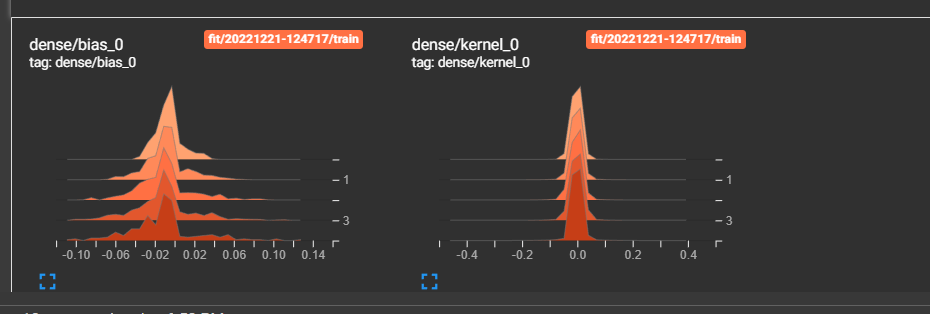

# Observation

- we can observe that 1/4th(which is  4,492,176/ 19,206,864) of the parameters are trainable 
- after 5 epoch we got the train accuracy of 82% and val_accuracy of 74.6%
- the weights in the last 3rd and 2nd dense layers are well distributed and the last layers wights have many values closer to zero since many of the features are zeroed out from the 128 dense neurons layer to 16 neurons layer for classification.

### Model-2

<pre>
1. Use <a href='https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16'>VGG-16</a> pretrained network without Fully Connected layers and initilize all the weights with Imagenet trained weights.
2. After VGG-16 network without FC layers, don't use FC layers, use conv layers only as Fully connected layer.Any FC 
layer can be converted to a CONV layer. This conversion will reduce the No of Trainable parameters in FC layers. 
For example, an FC layer with K=4096 that is looking at some input volume of size 7×7×512 can be equivalently expressed as a CONV layer with F=7,P=0,S=1,K=4096. 
In other words, we are setting the filter size to be exactly the size of the input volume, and hence the output will
simply be 1×1×4096 since only a single depth column “fits” across the input volume, giving identical result as the 
initial FC layer. You can refer <a href='http://cs231n.github.io/convolutional-networks/#convert'>this</a> link to better understanding of using Conv layer in place of fully connected layers.
3. Final architecture will be VGG-16 without FC layers(without top), 2 Conv layers identical to FC layers, 1 output layer for 16 class classification. <b>INPUT --> VGG-16 without Top layers(FC) --> 2 Conv Layers identical to FC -->Output Layer</b>
4. 4.Print model.summary() and plot the architecture of the model. 
<a href='https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model'>Reference for plotting model</a>
5. Train only last 2 Conv layers identical to FC layers, 1 output layer. Don't train the VGG-16 network. 
</pre>

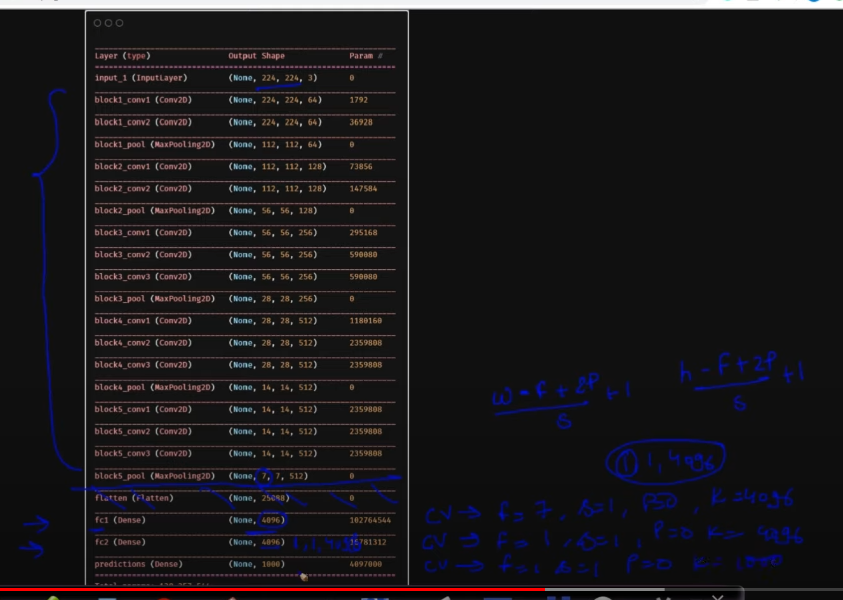

In [ ]:
#model_2
for layer in model.layers:
  layer.trainable = False
#Adding custom Layers 
x = model.output
x = Conv2D(filters=4096,kernel_size=8 ,strides=1,activation="relu")(x)
x = Conv2D(filters=4096,kernel_size=1 ,strides=1,activation="relu")(x)  
x = Flatten()(x)
# creating the final model 
output= Dense(16, activation="softmax")(x)
model_2 = Model(inputs = model.input, outputs = output)
# compile the model 
model_2.compile(loss="categorical_crossentropy",optimizer = 'Adam',metrics=['accuracy'])

In [ ]:
# summary of the model_2
model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
#fitting model_2
model_2.fit_generator(train_generator,steps_per_epoch=train_steps, epochs=5,verbose=1,callbacks=[tensorboard_callback]
                              )

<ipython-input-20-8d58a9e47380>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_2.fit_generator(train_generator,steps_per_epoch=train_steps, epochs=5,verbose=1,callbacks=[tensorboard_callback]


Epoch 1/5
1200/1200 [==============================] - 472s 394ms/step - loss: 0.6773 - accuracy: 0.7921
Epoch 2/5
1200/1200 [==============================] - 472s 394ms/step - loss: 0.6032 - accuracy: 0.8122
Epoch 3/5
1200/1200 [==============================] - 472s 393ms/step - loss: 0.5321 - accuracy: 0.8344
Epoch 4/5
1200/1200 [==============================] - 474s 395ms/step - loss: 0.4828 - accuracy: 0.8484
Epoch 5/5
1200/1200 [==============================] - 473s 394ms/step - loss: 0.4370 - accuracy: 0.8649


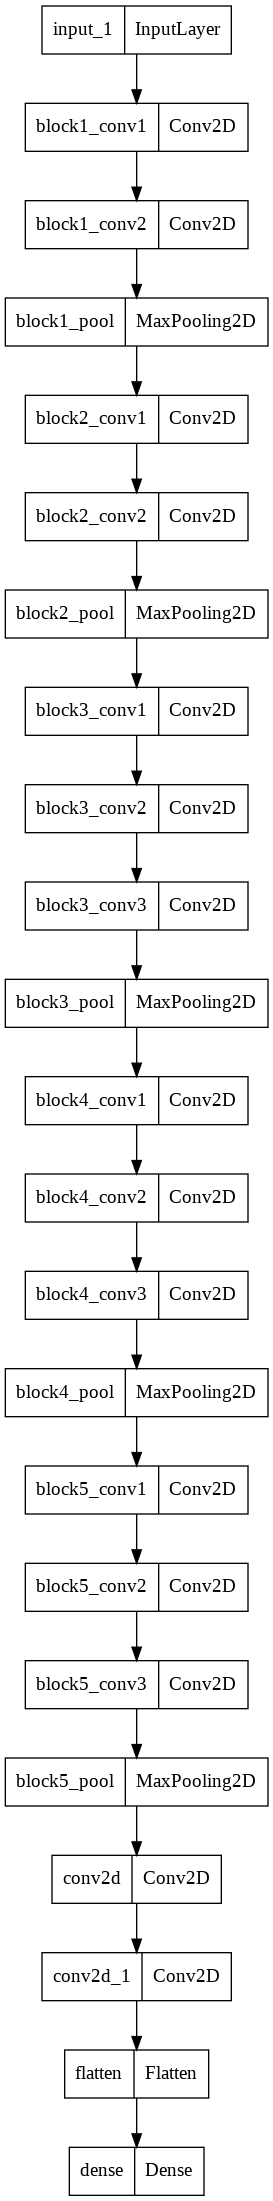

In [ ]:
# model graphs
tf.keras.utils.plot_model(
    model_2, to_file='model_2.png', show_shapes=False, show_layer_names=True, 
    rankdir='TB', expand_nested=False, dpi=96
)

In [ ]:
!rm -rf ./logs/ 

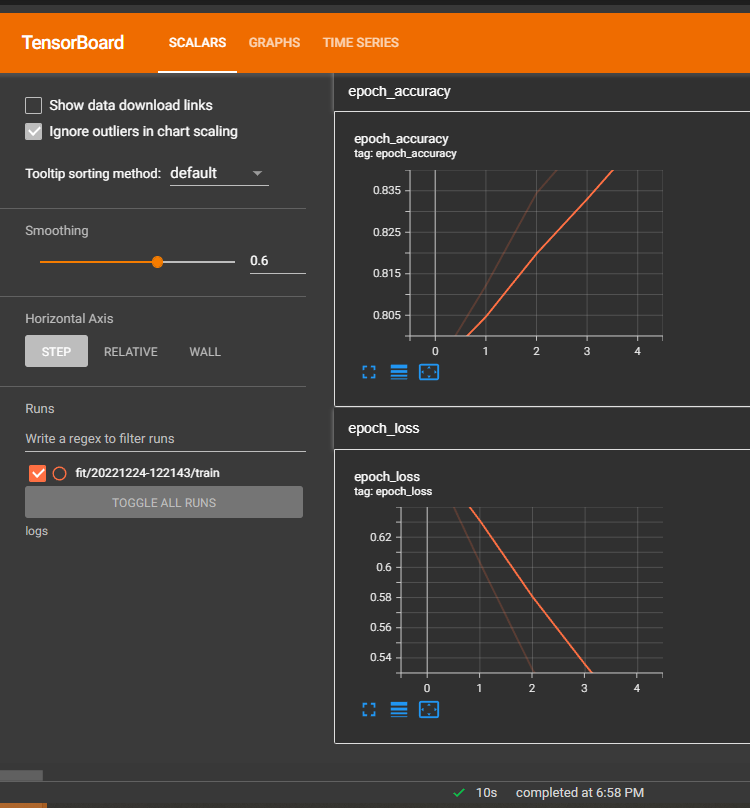

# Observation

- we can observe that 911/1000th (which is  151,068,688/  165,783,376) of the parameters are trainable 
- after 5 epoch we got the train accuracy of 86.49%


### Model-3

<pre>
1. Use same network as Model-2 '<b>INPUT --> VGG-16 without Top layers(FC) --> 2 Conv Layers identical to FC --> Output Layer</b>' and train only Last 6 Layers of VGG-16 network, 2 Conv layers identical to FC layers, 1 output layer.
</pre>

In [ ]:
#model_1
for layer in model.layers:
  layer.trainable = False
for layer in model.layers[-6:]: # training last 6 layers of vgg16
    layer.trainable = True
    print("Layer '%s' is trainable" % layer.name)  

Layer 'block4_conv3' is trainable
Layer 'block4_pool' is trainable
Layer 'block5_conv1' is trainable
Layer 'block5_conv2' is trainable
Layer 'block5_conv3' is trainable
Layer 'block5_pool' is trainable


In [ ]:
#model_3
#Adding custom Layers 
x = model.output
x = Conv2D(filters=4096,kernel_size=8 ,strides=1,activation="relu")(x)
x = Conv2D(filters=4096,kernel_size=1 ,strides=1,activation="relu")(x)
x = Flatten()(x)
# creating the final model 
output = Dense(16, activation="softmax")(x)
model_3 = Model(inputs = model.input, outputs = output)
# compile the model 
model_3.compile(loss="categorical_crossentropy",optimizer = 'Adam',metrics=['accuracy'])

In [ ]:
model_3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

In [ ]:
#fitting model_3
model_3.fit_generator(train_generator,steps_per_epoch=train_steps, epochs=2,
                             callbacks=[tensorboard_callback])

Epoch 1/2


<ipython-input-27-0939d2b11be3>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_3.fit_generator(train_generator,steps_per_epoch=train_steps, epochs=2,


1200/1200 [==============================] - 788s 657ms/step - loss: 2.7729 - accuracy: 0.0631
Epoch 2/2
1200/1200 [==============================] - 787s 655ms/step - loss: 2.7728 - accuracy: 0.0616


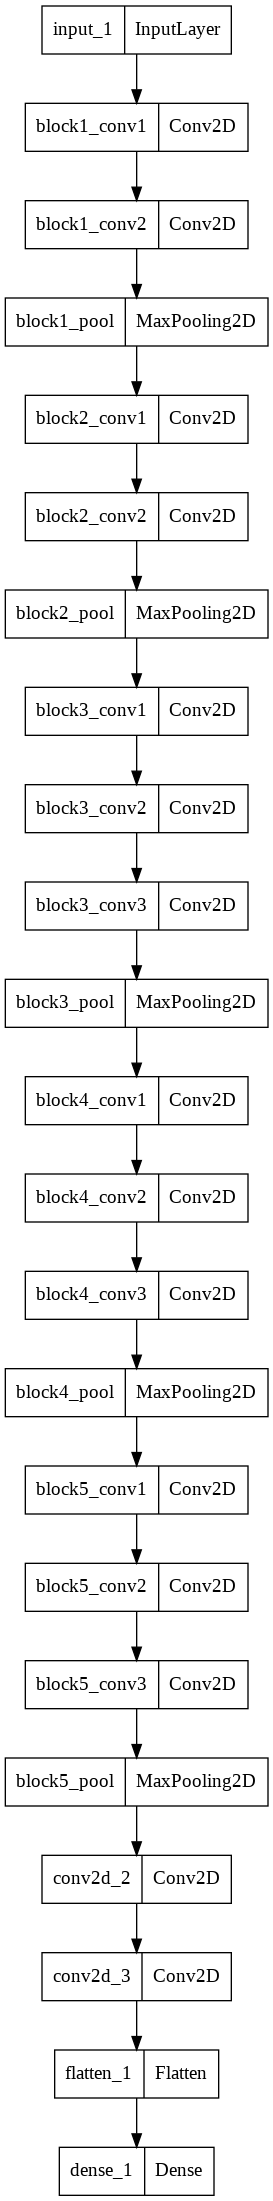

In [ ]:
# model graphs
tf.keras.utils.plot_model(
    model_3, to_file='model_3.png', show_shapes=False, show_layer_names=True, 
    rankdir='TB', expand_nested=False, dpi=96
)

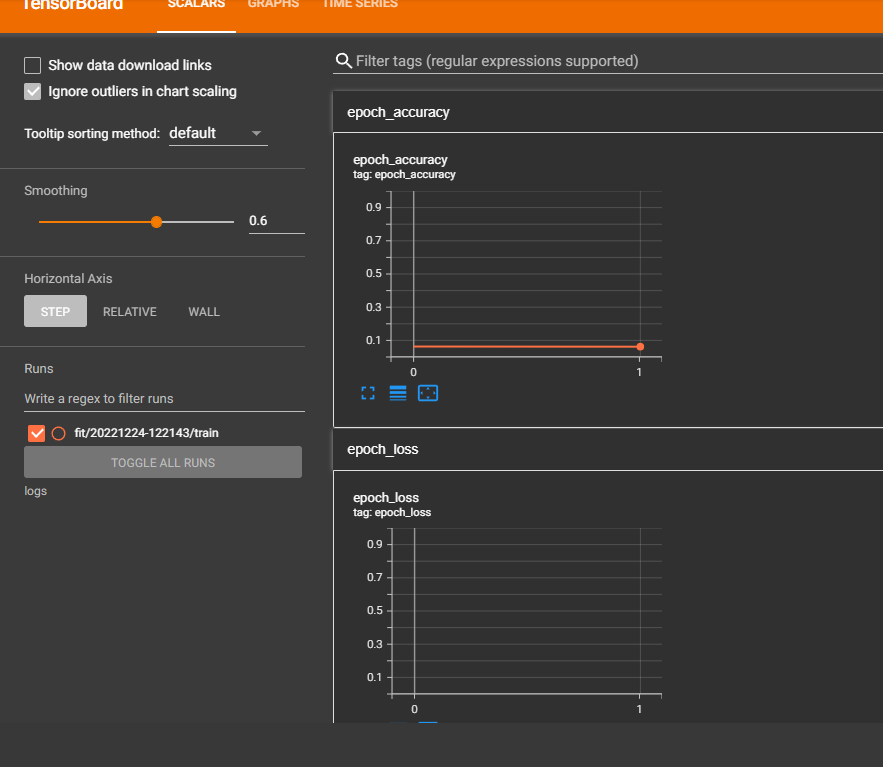

# Observation

- we can observe that 968/1000th(which is  160,507,920/ 165,783,376) of the parameters are trainable 
- after 5 epoch we got the train accuracy of 6.16%.

# Summary

In [6]:
# Please compare all your models using Prettytable library
#http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

0
x = PrettyTable()
x.field_names = ["Features", "Model", "Epochs", "Train accuracy", "CV accuracy"]
x.add_row(["Assignment 1 VGG16 w/o FC + 1 Conv + 1 MP + 2 FC + output", "CNN+Dense+softmax", "5", "82.02%","74.64% "])
x.add_row(["Assignment 2 VGG16 w/o FC + 2 Conv + output", "CNN+softmax","5", "86.49%", "-" ])
x.add_row(["Assignment 3 VGG16 w/o FC + 2 Conv + output", "CNN+softmax","2", "6.16%", "- " ])
print(x)

+-----------------------------------------------------------+-------------------+--------+----------------+-------------+
|                          Features                         |       Model       | Epochs | Train accuracy | CV accuracy |
+-----------------------------------------------------------+-------------------+--------+----------------+-------------+
| Assignment 1 VGG16 w/o FC + 1 Conv + 1 MP + 2 FC + output | CNN+Dense+softmax |   5    |     82.02%     |   74.64%    |
|        Assignment 2 VGG16 w/o FC + 2 Conv + output        |    CNN+softmax    |   5    |     86.49%     |      -      |
|        Assignment 3 VGG16 w/o FC + 2 Conv + output        |    CNN+softmax    |   2    |     6.16%      |      -      |
+-----------------------------------------------------------+-------------------+--------+----------------+-------------+
